<a href="https://colab.research.google.com/github/Ruwai/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [10]:
# TODO
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'

data = pd.read_csv(url, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [13]:
data.shape

(690, 16)

In [0]:
cols = [
    'A1',
    'A2',
    'A3',
    'A4',
    'A5',
    'A6',
    'A7',
    'A8',
    'A9',
    'A10',
    'A11',
    'A12',
    'A13',
    'A14',
    'A15',
    'A16'
]
data.columns = cols

In [15]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [16]:
data['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [0]:
import numpy as np
### remember A16 is for case approval
data = data.replace('?', np.NaN)
data = data.replace('+', 1)
data = data.replace('-', 0)

In [76]:
data.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [19]:
data['A15'].dtype

dtype('int64')

In [20]:
data['A14'].dtype

dtype('O')

In [0]:
data['A11'] = data['A11'].astype(float,copy=False)
data['A14'] = data['A14'].astype(float,copy=False)
data['A15'] = data['A15'].astype(float,copy=False)

In [22]:
data.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0.0,f,g,260.0,0.0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2.0,t,g,200.0,394.0,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1.0,t,g,200.0,1.0,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0.0,f,g,280.0,750.0,0
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0.0,t,g,0.0,0.0,0


In [0]:
#this should clean it up a bit

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [23]:
# TODO
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
!pip3 install --upgrade seaborn==0.9.0

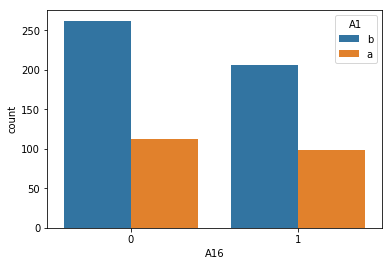

In [33]:
sns.countplot(x='A16', hue='A1', data=data);

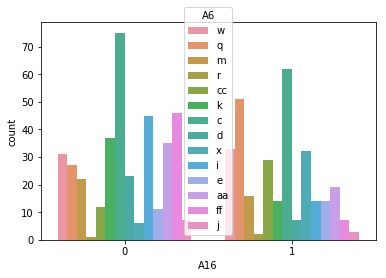

In [47]:
sns.countplot(x='A16', hue='A6', data=data);

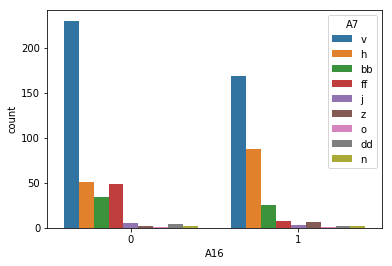

In [48]:
sns.countplot(x='A16', hue='A7', data=data);

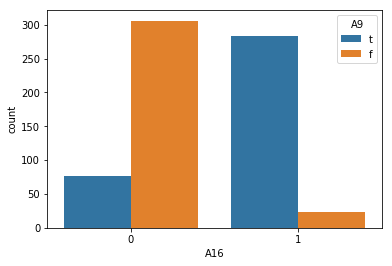

In [50]:
sns.countplot(x='A16', hue='A9', data=data);

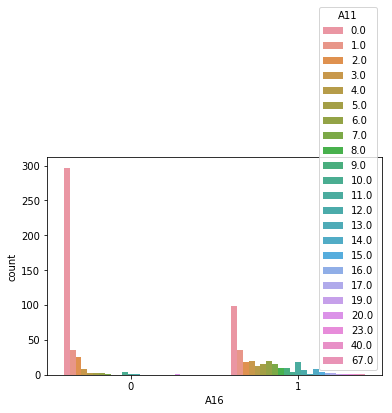

In [52]:
sns.countplot(x='A16', hue='A11', data=data);

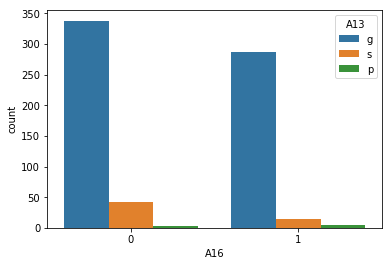

In [55]:
sns.countplot(x='A16', hue='A13', data=data);

In [56]:
data.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0.0,f,g,260.0,0.0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2.0,t,g,200.0,394.0,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1.0,t,g,200.0,1.0,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0.0,f,g,280.0,750.0,0
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0.0,t,g,0.0,0.0,0


In [0]:
## the continuous are : A2, A3, A8, A11, A14, A15

scatterplots / relplots didn't work/looked ugly


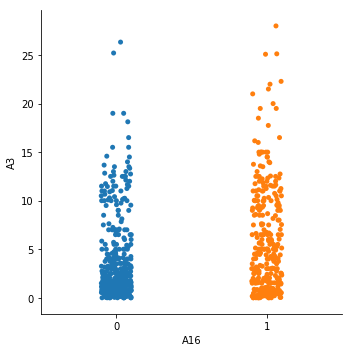

In [61]:
sns.catplot(x='A16', y='A3', data=data);

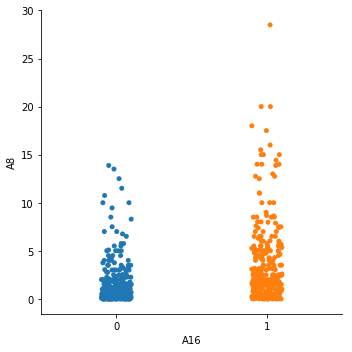

In [64]:
sns.catplot(x='A16', y='A8', data=data);

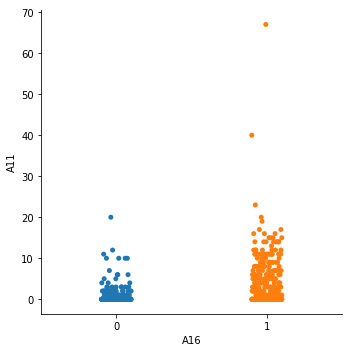

In [65]:
sns.catplot(x='A16', y='A11', data=data);

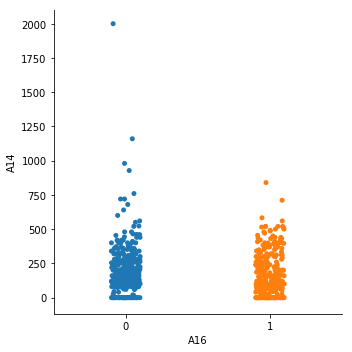

In [66]:
sns.catplot(x='A16', y='A14', data=data);

In [78]:
from scipy import stats

#separate the yes's from the no's
data_y = data[data['A16'] == 1]
data_n = data[data['A16'] == 0]
data_y.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,1


In [79]:
data.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [77]:
stats.ttest_ind(data_y['A3'], data_n['A3'])

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

In [94]:
stats.ttest_ind(data_y['A8'], data_n['A8'])

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

In [83]:
stats.ttest_ind(data_y['A11'], data_n['A11'])

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

In [86]:
stats.ttest_ind(data_y['A15'], data_n['A15'])

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

In [99]:
test = pd.crosstab(data_y['A11'].value_counts(),data_n['A11'].value_counts())
type(test)

pandas.core.frame.DataFrame

In [120]:
stats.chi2_contingency(test)
#did this work????

(84.0,
 0.001373029728812089,
 49,
 array([[1.33333333, 0.33333333, 0.66666667, 0.33333333, 0.33333333,
         0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.08333333, 0.16666667, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333],
        [0.66666667, 0.16666667, 0.33333333, 0.16666667, 0.16666667,
         0.16666667, 0.16666667, 0.16666667],
        [0.33333333, 0.08333333, 0.16666667, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333],
        [0.33333333, 0.08333333, 0.16666667, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333],
        [0.33333333, 0.08333333, 0.16666667, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333],
        [0.33333333, 0.08333333, 0.16666667, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333],
        [0.33333333, 0.08333333, 0.16666667, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333]]))

In [121]:
is_this_test = pd.crosstab(data_y['A8'].value_counts(),data_n['A8'].value_counts())
stats.chi2_contingency(is_this_test)

(840.0000000000001,
 8.94825974362437e-72,
 225,
 array([[6.44642857, 2.375     , 1.01785714, 2.375     , 0.67857143,
         2.03571429, 0.33928571, 0.67857143, 0.33928571, 0.67857143,
         0.33928571, 0.33928571, 0.33928571, 0.33928571, 0.33928571,
         0.33928571],
        [2.375     , 0.875     , 0.375     , 0.875     , 0.25      ,
         0.75      , 0.125     , 0.25      , 0.125     , 0.25      ,
         0.125     , 0.125     , 0.125     , 0.125     , 0.125     ,
         0.125     ],
        [1.01785714, 0.375     , 0.16071429, 0.375     , 0.10714286,
         0.32142857, 0.05357143, 0.10714286, 0.05357143, 0.10714286,
         0.05357143, 0.05357143, 0.05357143, 0.05357143, 0.05357143,
         0.05357143],
        [2.375     , 0.875     , 0.375     , 0.875     , 0.25      ,
         0.75      , 0.125     , 0.25      , 0.125     , 0.25      ,
         0.125     , 0.125     , 0.125     , 0.125     , 0.125     ,
         0.125     ],
        [0.67857143, 0.25      , 0.

In [103]:
new_test = pd.crosstab(data_y['A9'].value_counts(),data_n['A9'].value_counts())
type(new_test)

pandas.core.frame.DataFrame

In [105]:
stats.chi2_contingency(new_test)

#i think this is right

(0.0, 1.0, 1, array([[0.5, 0.5],
        [0.5, 0.5]]))

In [118]:
test_again = pd.crosstab(data_y['A9'].value_counts(),data_n['A10'].value_counts())
test_again
## is this right? i think so...

A10,86,297
A9,,
23,0,1
284,1,0


In [119]:
stats.chi2_contingency(test_again)

(0.0, 1.0, 1, array([[0.5, 0.5],
        [0.5, 0.5]]))

In [111]:
test_more = pd.crosstab(data_y['A4'].value_counts(),data_n['A4'].value_counts())
test_more

A4,118,263
A4,,
118,1,0
263,0,1


In [112]:
stats.chi2_contingency(test_more)

(0.0, 1.0, 1, array([[0.5, 0.5],
        [0.5, 0.5]]))

In [0]:
#okay i think this is starting to make more sense now

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

#**So about those t-tests...**

I believe that with the independent t-test on two samples from the A8 and A11 column were the most informative. This is because the p-values were the smallest at far below p < 0.01, (A8  :   p=3.67e-18 . A11  :  p=7.95e-29).

With that we can reject the null hypothesis that there is no likely relationship between the data in those columns and approval status. Which in turn means that there is a significant difference between those who were approved and those who were not approved with respect to columns A8 and A11. 

#**And that chi-square contingency test?**

From what I can interpret about chi-square is that it is (the formal definition): 'the sum of squares of normally distributed values'. And the test being (formal definition): 'testing whether or not two categorical variables are independent or related'. 

So from that I looked at **almost** every category in the dataframe to look for those said relationships to determine whether or not those categorical variables were independent or related. And it seems like the categories that were perfect squares seemed to be the 'related' categories, while the categories like **A11** and **A8** as previously idetified as the categories that would be the most likely to be independent, *were in fact*, proven by the **chisquare_contingency** test to be independent.


#**A little reflection to close it out**

Honestly the sprint challenge was not as difficult as I imagined from a pretty difficult week. Okay I lied a little bit, it was difficult finding a way to plot the data with matplotlib so I did a hard reset on matplotlib and went straight to seaborn. *just want to say, big shoutout to Seaborn* **SERIOUSLY SEABORN IS AN AMAZING TOOL** *friendly reminder to not get frustrated with Matplotlib, it's a learning experience*


I struggled in the beginning to understand the statistics concepts and the math jargon, but after studying and reading some of the *Comic Guide to Statistics* that @Aaron recommended we read on our free time, I was able to grasp a 'better' understanding of what we've learned this week. 


Did I understand the concepts this week? I hope so.
Can I explain it in a simple way? Not yet...
Will I continue learning more about stats after this week? Definitely!
